### Import Modules and Data

In [1]:
from typing import Optional

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df_ger = pd.read_csv("data/preprocessed_survey_results.csv")
df_ger_encoded = pd.read_csv("data/preprocessed_survey_results_encoded.csv")

In [3]:
df_ger_encoded

,Unnamed: 0,Salary,YearsCode,YearsCodePro,OrgSize,Age,Gender,Bachelor’s degree,Doctoral degree,Master’s degree,...,R,Ruby,Rust,SAS,SQL,Scala,Solidity,Swift,TypeScript,VBA
0,25,90647.0,16.0,9.0,4.0,3.0,Man,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,48,106644.0,40.0,25.0,4.0,6.0,Man,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,49,51192.0,7.0,4.0,5.0,3.0,Man,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,59,63986.0,4.0,2.0,5.0,3.0,Woman,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,73,63986.0,10.0,2.0,9.0,2.0,Man,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,72915,69318.0,5.0,1.0,9.0,2.0,Man,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2072,72964,77850.0,9.0,6.0,5.0,3.0,Other,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2073,73009,46923.0,5.0,4.0,4.0,3.0,Man,1,0,0,...,0,1,1,0,0,1,0,0,1,0
2074,73019,42657.0,12.0,4.0,4.0,3.0,Man,0,0,1,...,0,0,0,0,0,0,0,1,1,0


#### Helper Functions

In [4]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

def ridge_plot(df_ridge_plot, x_label: str, y_label: str, row_order: Optional[list[str]]):
    # Initialize the FacetGrid object
    # pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(df_ridge_plot, row=y_label, row_order=row_order, hue=y_label, aspect=15, height=.5)#, palette=pal, )

    # Draw the densities in a few steps
    g.map(sns.kdeplot, x_label, bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, x_label, clip_on=False, color="w", lw=2, bw_adjust=.5)

    # passing color=None to refline() uses the hue mapping
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,ha="left", va="center", transform=ax.transAxes)

    g.map(label, 'Salary')

    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

## Correlation

,Salary,YearsCode,YearsCodePro,OrgSize,Age,in-person,remote
Salary,1.000000,0.347609,0.394704,0.180743,0.330488,-0.103855,0.145464
YearsCode,0.347609,1.000000,0.877304,0.001295,0.764999,0.041489,0.062538
YearsCodePro,0.394704,0.877304,1.000000,-0.006339,0.786251,0.015474,0.076236
OrgSize,0.180743,0.001295,-0.006339,1.000000,-0.004074,-0.083152,-0.059031
Age,0.330488,0.764999,0.786251,-0.004074,1.000000,0.041077,0.045044
in-person,-0.103855,0.041489,0.015474,-0.083152,0.041077,1.000000,-0.209998
remote,0.145464,0.062538,0.076236,-0.059031,0.045044,-0.209998,1.000000


<AxesSubplot: >

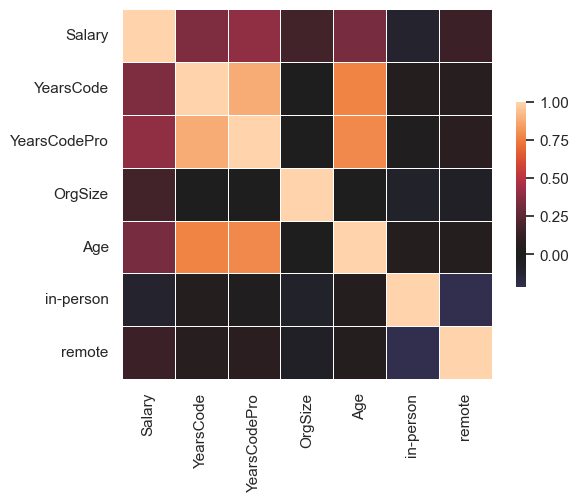

In [5]:
corr = df_ger_encoded[['Salary', 'YearsCode', 'YearsCodePro', 'OrgSize', 'Age', 'in-person', 'remote']].corr()

display(corr)
sns.heatmap(corr, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

YearsCode, YearsCodePro, OrgSize and Age have a good correlation to salary. But YearsCode, YearsCodePro among themselves obviously even more and therefore not both can be used. Age and YearsCode also have a strong correlation that needs to be adressed.

## Plots

### Violinplots

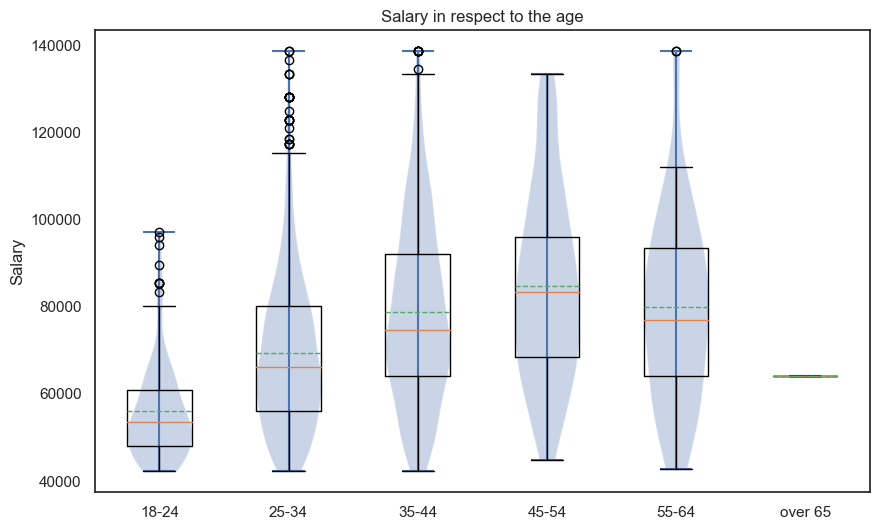

In [6]:
data = [
    df_ger[df_ger['Age'] == "18-24"]['Salary'],
    df_ger[df_ger['Age'] == "25-34"]['Salary'],
    df_ger[df_ger['Age'] == "35-44"]['Salary'],
    df_ger[df_ger['Age'] == "45-54"]['Salary'],
    df_ger[df_ger['Age'] == "55-64"]['Salary'],
    df_ger[df_ger['Age'] == "over 65"]['Salary'],
]
labels=["18-24", "25-34", "35-44", "45-54", "55-64", "over 65"]

_, ax = plt.subplots(figsize=(10, 6))
ax.violinplot(data)
ax.boxplot(data, showmeans=True, meanline=True)
ax.set_ylabel("Salary")
ax.set_xticklabels(labels)
ax.set(title='Salary in respect to the age')
plt.show()

An increase in salary with age is clearly visible.

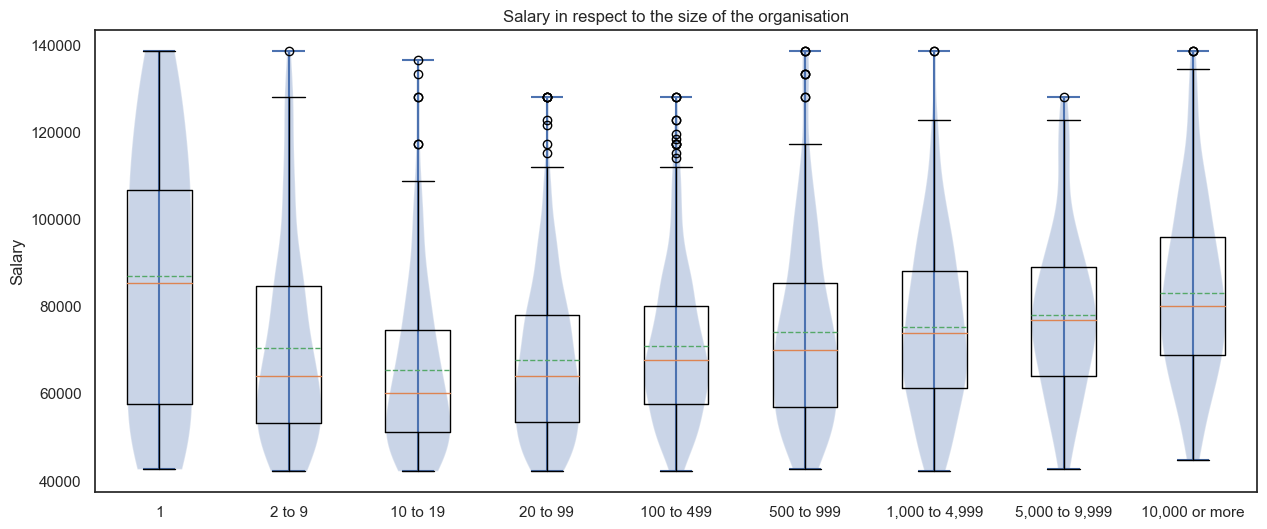

In [7]:
data = [
    df_ger[df_ger['OrgSize'] == "1"]['Salary'],
    df_ger[df_ger['OrgSize'] == "2 to 9"]['Salary'],
    df_ger[df_ger['OrgSize'] == "10 to 19"]['Salary'],
    df_ger[df_ger['OrgSize'] == "20 to 99"]['Salary'],
    df_ger[df_ger['OrgSize'] == "100 to 499"]['Salary'],
    df_ger[df_ger['OrgSize'] == "500 to 999"]['Salary'],
    df_ger[df_ger['OrgSize'] == "1,000 to 4,999"]['Salary'],
    df_ger[df_ger['OrgSize'] == "5,000 to 9,999"]['Salary'],
    df_ger[df_ger['OrgSize'] == "10,000 or more"]['Salary'],
]
labels=["1", "2 to 9", "10 to 19", "20 to 99", "100 to 499", "500 to 999", "1,000 to 4,999", "5,000 to 9,999", "10,000 or more"]

_, ax = plt.subplots(figsize=(15, 6))
ax.violinplot(data)
ax.boxplot(data, showmeans=True, meanline=True)
ax.set_ylabel("Salary")
ax.set_xticklabels(labels)
ax.set(title='Salary in respect to the size of the organisation')
plt.show()

An increase in salary with company size is visible. For an individual developer there may be too little data to make a proper statement.

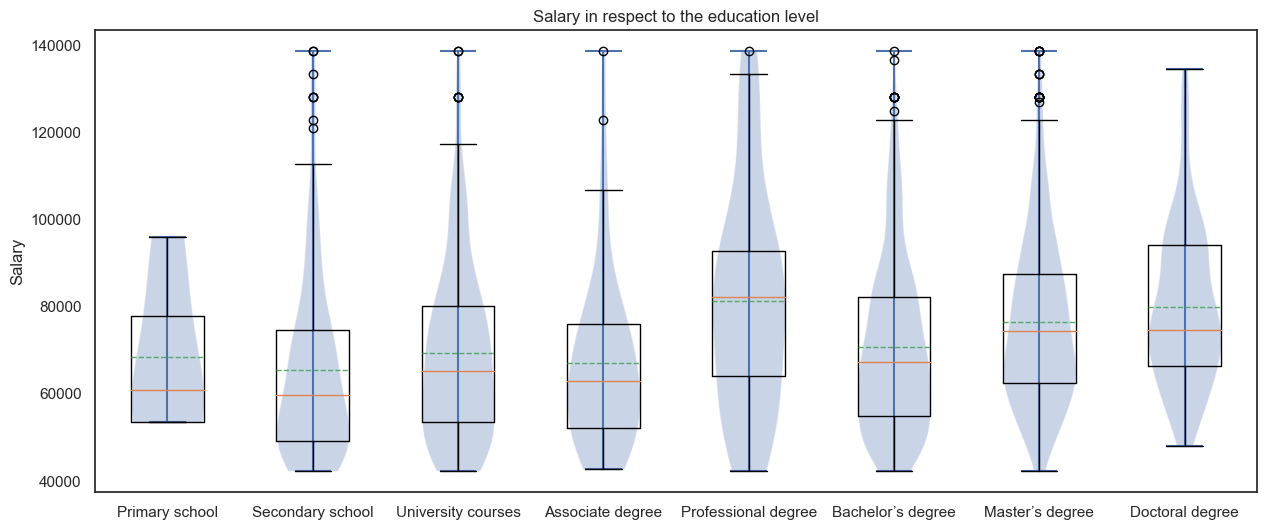

In [8]:
data = [
    df_ger[df_ger['EdLevel'] == "Primary school"]['Salary'],
    df_ger[df_ger['EdLevel'] == "Secondary school"]['Salary'],
    df_ger[df_ger['EdLevel'] == "University courses"]['Salary'],
    df_ger[df_ger['EdLevel'] == "Associate degree"]['Salary'],
    df_ger[df_ger['EdLevel'] == "Professional degree"]['Salary'],
    df_ger[df_ger['EdLevel'] == "Bachelor’s degree"]['Salary'],
    df_ger[df_ger['EdLevel'] == "Master’s degree"]['Salary'],
    df_ger[df_ger['EdLevel'] == "Doctoral degree"]['Salary'],
]
labels=["Primary school","Secondary school","University courses","Associate degree","Professional degree","Bachelor’s degree","Master’s degree","Doctoral degree"]

_, ax = plt.subplots(figsize=(15, 6))
ax.violinplot(data)
ax.boxplot(data, showmeans=True, meanline=True)
ax.set_ylabel("Salary")
ax.set_xticklabels(labels)
ax.set(title='Salary in respect to the education level')
plt.show()

For the education level there is also a difference visible but it is not clearly linear and therefore should be one hot encoded.

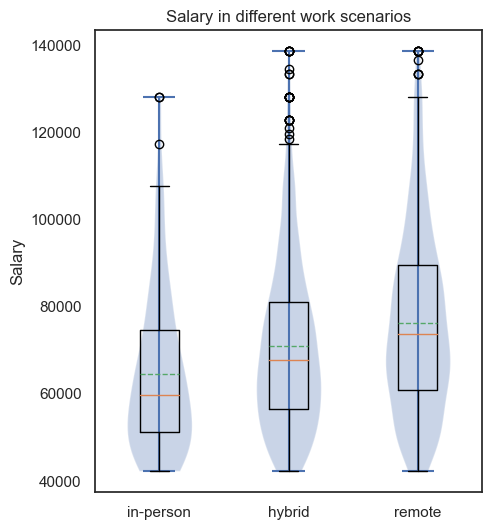

In [9]:
data = [
    df_ger[df_ger['RemoteWork'] == "in-person"]['Salary'],
    df_ger[df_ger['RemoteWork'] == "hybrid"]['Salary'],
    df_ger[df_ger['RemoteWork'] == "remote"]['Salary']
]
labels=["in-person","hybrid","remote"]

_, ax = plt.subplots(figsize=(5, 6))
ax.violinplot(data)
ax.boxplot(data, showmeans=True, meanline=True)
ax.set_ylabel("Salary")
ax.set_xticklabels(labels)
ax.set(title='Salary in different work scenarios')
plt.show()

There is a clear difference in the 3 different working conditions and therefore worth using in the regression.

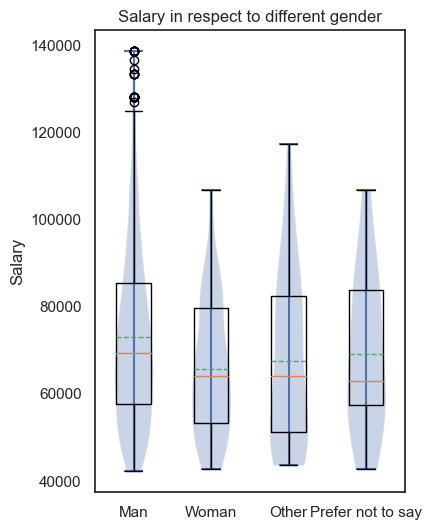

In [10]:
data = [
    df_ger[df_ger['Gender'] == "Man"]['Salary'],
    df_ger[df_ger['Gender'] == "Woman"]['Salary'],
    df_ger[df_ger['Gender'] == "Other"]['Salary'],
    df_ger[df_ger['Gender'] == "Prefer not to say"]['Salary']
]
labels=["Man", "Woman", "Other", "Prefer not to say"]

_, ax = plt.subplots(figsize=(4, 6))
ax.violinplot(data)
ax.boxplot(data, showmeans=True, meanline=True)
ax.set_ylabel("Salary")
ax.set_xticklabels(labels)
ax.set(title='Salary in respect to different gender')
plt.show()

The difference between the salaries of the different genders is not really significant, which is somewhat relieving.

### Ridgeplots

C:\Users\jonas\anaconda3\envs\ds\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\jonas\anaconda3\envs\ds\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
C:\Users\jonas\anaconda3\envs\ds\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
C:\Users\jonas\anaconda3\envs\ds\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\jonas\anaconda3\envs\ds\lib\site-packages\sea

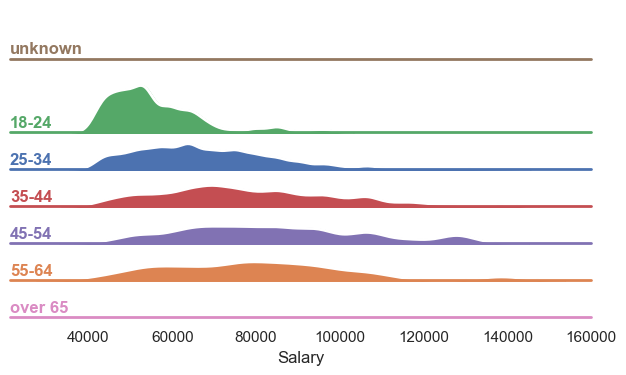

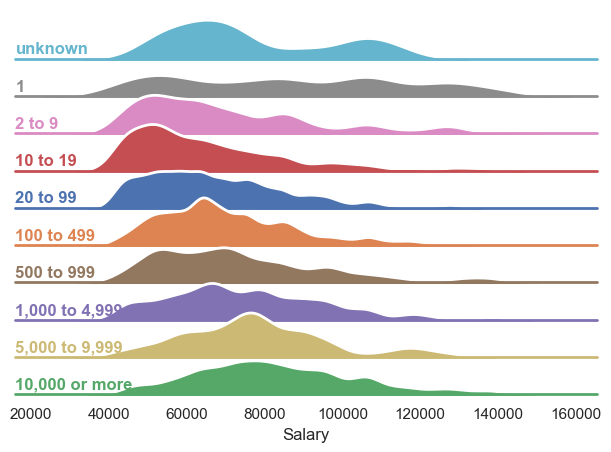

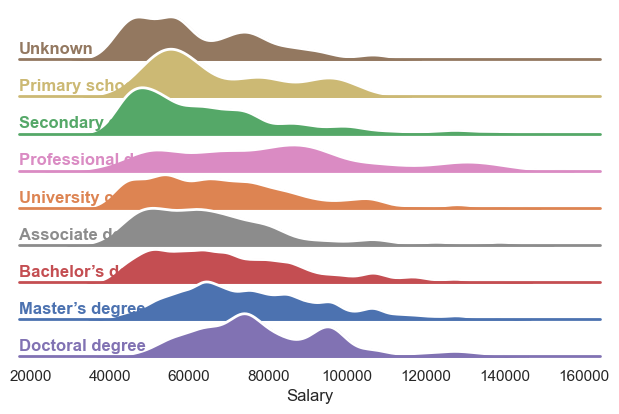

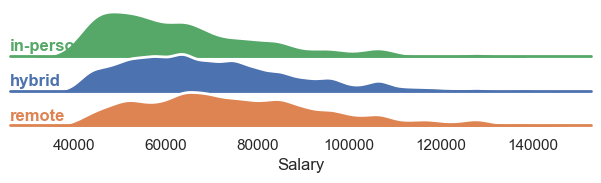

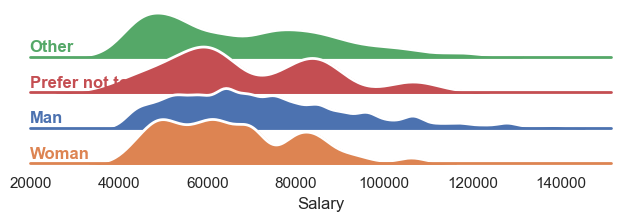

In [11]:
df_ridge = df_ger.copy()
df_ridge = df_ridge[df_ger['Salary']<300000]

ridge_plot(df_ridge[['Salary', 'Age']], y_label='Age', x_label='Salary', row_order=["unknown","under 18","18-24","25-34","35-44","45-54","55-64","over 65"])
ridge_plot(df_ridge[['Salary', 'OrgSize']], y_label='OrgSize', x_label='Salary', row_order=["unknown","1","2 to 9","10 to 19","20 to 99","100 to 499","500 to 999","1,000 to 4,999","5,000 to 9,999","10,000 or more"])
ridge_plot(df_ridge[['Salary', 'EdLevel']], y_label='EdLevel', x_label='Salary', row_order=["Unknown","Primary school","Secondary school","Professional degree","University courses","Associate degree","Bachelor’s degree","Master’s degree","Doctoral degree"])
ridge_plot(df_ridge[['Salary', 'RemoteWork']], y_label='RemoteWork', x_label='Salary', row_order=['in-person', 'hybrid', 'remote'])
ridge_plot(df_ridge[['Salary', 'Gender']], y_label='Gender', x_label='Salary', row_order=['Other', 'Prefer not to say', 'Man', 'Woman'])

The ridge plots give a similar result to the violin plots with a little better overview in the distribution.

### PairPlot

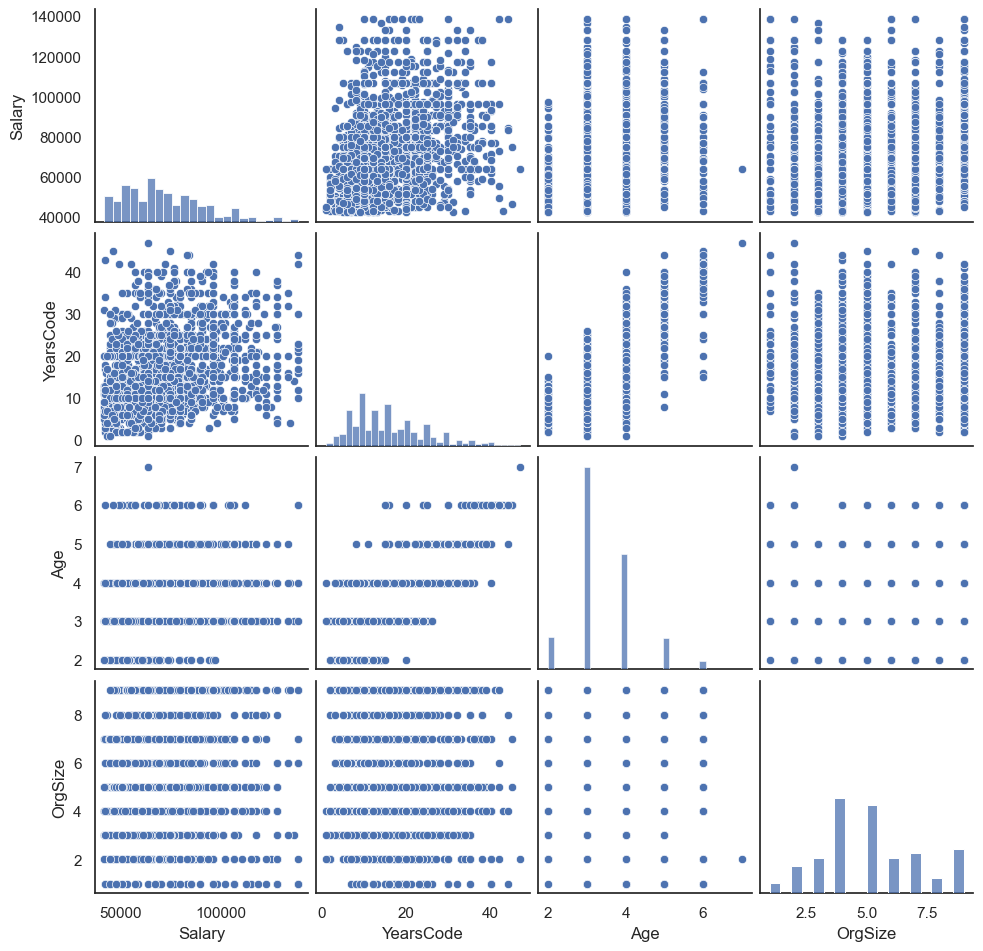

In [12]:
rel = sns.pairplot(df_ger_encoded[['Salary', 'YearsCode', 'Age', 'OrgSize']])
rel.fig.subplots_adjust(top=.95)

Due to Age and OrgSize being a categorical feature it is hard to see a correlation. But in general, the correlation are not really high, but still there.